In [1]:
install.packages("httpgd")

also installing the dependencies ‘systemfonts’, ‘unigd’


Warning message in install.packages("httpgd"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘unigd’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘httpgd’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(tidyverse)
library(gprofiler2)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘gprofiler2’ was built under R version 4.2.3”


In [2]:
raw_counts <- read_tsv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/counts.tsv', comment = '#')
norm_counts <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_norm_counts.csv')
degs <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_results.csv')

Rows: 9920 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Geneid, Chr, Start, End, Strand
dbl (9): Length, dedup/star/Int-01_S42_L005.bam:Int-01_S42_L005, dedup/star/...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (8): Int-01_S42_L005, Int-02_S43_L005, Int-03_S44_L005, Int-04_S45_L005,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full c

In [3]:
norm_counts_long <- norm_counts |>
    pivot_longer(-gene_id, names_to = 'sample', values_to = 'norm_count') |>
    mutate(sample = str_remove(sample, "_S[0-9]{2}_L005")) |>
    separate(sample, c('sample', 'replicate'), "-")

In [4]:
norm_counts_long

gene_id,sample,replicate,norm_count
<chr>,<chr>,<chr>,<dbl>
Smp_000020,Int,01,127.73916
Smp_000020,Int,02,131.14083
Smp_000020,Int,03,111.52952
Smp_000020,Int,04,124.65822
Smp_000020,Liv,01,149.34795
Smp_000020,Liv,02,76.53642
Smp_000020,Liv,03,141.55048
Smp_000020,Liv,04,118.66222
Smp_000030,Int,01,820.51804


## Showing boxplots of degs

In [6]:
degs_filtered <- degs |>
    filter(padj <= 0.05) |>
    filter(abs(log2FoldChange) > 2)
degs_filtered

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_133770,51.789259,-2.114488,0.4881492,-4.331644,1.480002e-05,0.0033584631
Smp_145910,8.638523,2.098396,0.5347983,3.923715,8.719402e-05,0.0115124826
Smp_210300,10.764948,-2.145178,0.5365708,-3.997939,6.389635e-05,0.0097098333
Smp_313480,36.049749,-2.314234,0.4643804,-4.983488,6.244820e-07,0.0003810634
Smp_317970,6.809802,-2.321859,0.6743552,-3.443080,5.751284e-04,0.0361373335
Smp_319430,4.118073,4.996656,1.3122760,3.807626,1.403072e-04,0.0150671248
Smp_319450,4.256358,5.045801,1.2971390,3.889946,1.002664e-04,0.0122355408
Smp_319460,4.139686,5.006984,1.2945514,3.867737,1.098500e-04,0.0130107684
Smp_321810,18.530454,2.155436,0.4695797,4.590138,4.429533e-06,0.0015473486


In [7]:
norm_counts_filtered <- norm_counts |>
    filter(gene_id %in% degs_filtered$gene_id)
norm_counts_filtered

gene_id,Int-01_S42_L005,Int-02_S43_L005,Int-03_S44_L005,Int-04_S45_L005,Liv-01_S38_L005,Liv-02_S39_L005,Liv-03_S40_L005,Liv-04_S41_L005
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_133770,80.352049,78.684497,61.2626921,118.472892,2.212562,32.667986,11.995804,28.665592
Smp_145910,3.090463,2.914241,3.9270956,2.854768,16.594217,10.267081,16.794125,12.666192
Smp_210300,16.997549,11.656962,16.4938017,25.692916,2.212562,4.666855,2.399161,5.999775
Smp_313480,65.414809,96.169940,35.3438608,47.579475,4.425124,14.000565,4.798321,20.665892
Smp_317970,10.301545,8.742722,10.2104487,15.225432,0.000000,1.866742,4.798321,3.333208
Smp_319430,0.000000,0.000000,0.7854191,0.000000,4.425124,22.400905,0.000000,5.333133
Smp_319450,0.000000,0.000000,0.7854191,0.000000,5.531406,22.400905,0.000000,5.333133
Smp_319460,0.000000,0.000000,0.7854191,0.000000,5.531406,21.467534,0.000000,5.333133
Smp_321810,4.635695,20.399684,3.9270956,5.233742,27.657028,33.601357,28.789929,23.999100


In [8]:
norm_counts_filtered_long <- norm_counts_filtered |>
    pivot_longer(-gene_id, names_to = 'sample', values_to = 'norm_count') |>
    mutate(sample = str_remove(sample, "_S[0-9]{2}_L005")) |>
    separate(sample, c('sample', 'replicate'), "-")
norm_counts_filtered_long

gene_id,sample,replicate,norm_count
<chr>,<chr>,<chr>,<dbl>
Smp_133770,Int,01,80.352049
Smp_133770,Int,02,78.684497
Smp_133770,Int,03,61.262692
Smp_133770,Int,04,118.472892
Smp_133770,Liv,01,2.212562
Smp_133770,Liv,02,32.667986
Smp_133770,Liv,03,11.995804
Smp_133770,Liv,04,28.665592
Smp_145910,Int,01,3.090463


In [9]:
#install.packages("gridExtra")
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




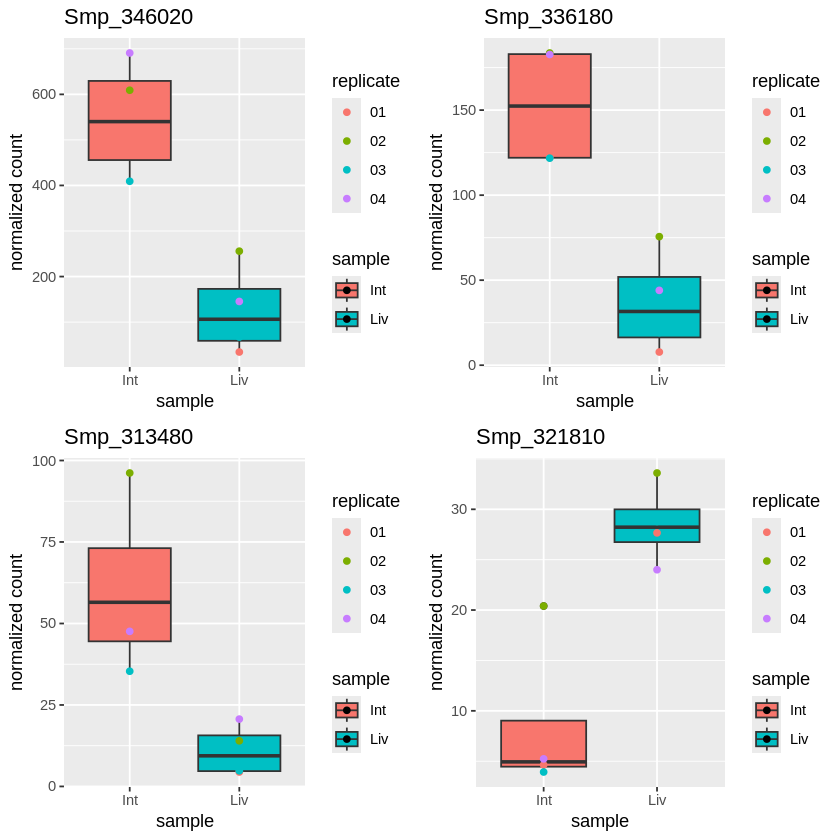

In [10]:
plot1 <- norm_counts_filtered_long |>
    filter(gene_id == 'Smp_346020') |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
    geom_boxplot() +
    geom_point(aes(color = replicate)) +
    ggtitle("Smp_346020") +
    labs(y = "normalized count")

plot2 <- norm_counts_filtered_long |>
    filter(gene_id == 'Smp_336180') |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
    geom_boxplot() +
    geom_point(aes(color = replicate)) +
    ggtitle("Smp_336180") +
    labs(y = "normalized count")

plot3 <- norm_counts_filtered_long |>
    filter(gene_id == 'Smp_313480') |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
    geom_boxplot() +
    geom_point(aes(color = replicate)) +
    ggtitle("Smp_313480") +
    labs(y = "normalized count")

plot4 <- norm_counts_filtered_long |>
    filter(gene_id == 'Smp_321810') |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
    geom_boxplot() +
    geom_point(aes(color = replicate)) +
    ggtitle("Smp_321810") +
    labs(y = "normalized count")

grid.arrange(plot1, plot2, plot3, plot4, nrow = 2)

plotall4 <- arrangeGrob(plot1, plot2, plot3, plot4, nrow = 2, widths = 8, heights = 6)
ggsave("DEG_expression.png", plotall4, width = 8, height = 6)

## gprofiler

In [11]:
genes <- degs_filtered$gene_id
genes

[1] "Smp_133770" "Smp_145910" "Smp_210300" "Smp_313480" "Smp_317970"
 [6] "Smp_319430" "Smp_319450" "Smp_319460" "Smp_321810" "Smp_330100"
[11] "Smp_330900" "Smp_336180" "Smp_344300" "Smp_346020"

In [12]:
gostres <- gost(query = genes, organism = "smansoni")
gostres

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,0.04598747,89,2,2,1,0.02247191,GO:0007155,GO:BP,cell adhesion,4257,2719,GO:0009987


In [13]:
gProfiler <- gostplot(gostres, interactive = FALSE)
ggsave("gProfiler.png", gProfiler, width = 6, height = 4)